# Problem: Predicting Airplane Delays

The goals of this notebook are:
- Process and create a dataset from downloaded ZIP files
- Exploratory data analysis (EDA)
- Establish a baseline model and improve it

## Introduction to business scenario
You work for a travel booking website that is working to improve the customer experience for flights that were delayed. The company wants to create a feature to let customers know if the flight will be delayed due to weather when the customers are booking the flight to or from the busiest airports for domestic travel in the US. 

You are tasked with solving part of this problem by leveraging machine learning to identify whether the flight will be delayed due to weather. You have been given access to the a dataset of on-time performance of domestic flights operated by large air carriers. You can use this data to train a machine learning model to predict if the flight is going to be delayed for the busiest airports.

### Dataset
The provided dataset contains scheduled and actual departure and arrival times reported by certified US air carriers that account for at least 1 percent of domestic scheduled passenger revenues. The data was collected by the Office of Airline Information, Bureau of Transportation Statistics (BTS). The dataset contains date, time, origin, destination, airline, distance, and delay status of flights for flights between 2014 and 2018.
The data are in 60 compressed files, where each file contains a CSV for the flight details in a month for the five years (from 2014 - 2018). The data can be downloaded from this [link](https://ucstaff-my.sharepoint.com/:f:/g/personal/ibrahim_radwan_canberra_edu_au/EhWeqeQsh-9Mr1fneZc9_0sBOBzEdXngvxFJtAlIa-eAgA?e=8ukWwa). Please download the data files and place them on a relative path. Dataset(s) used in this assignment were compiled by the Office of Airline Information, Bureau of Transportation Statistics (BTS), Airline On-Time Performance Data, available with the following [link](https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ). 

# Step 1: Prepare the environment 

Use one of the labs which we have practised on with the Amazon Sagemakers where you perform the following steps:
1. Start a lab.
2. Create a notebook instance and name it "oncloudproject".
3. Increase the used memory to 25 GB from the additional configurations.
4. Open Jupyter Lab and upload this notebook into it.
5. Upload the two combined CVS files (combined_csv_v1.csv and combined_csv_v2.csv), which you created in Part A of this project.

**Note:** In case of the data is too much to be uploaded to the AWS, please use 20% of the data only for this task.

# Step 2: Build and evaluate simple models

Write code to perform the follwoing steps:
1. Split data into training, validation and testing sets (70% - 15% - 15%).
2. Use linear learner estimator to build a classifcation model.
3. Host the model on another instance
4. Perform batch transform to evaluate the model on testing data
5. Report the performance metrics that you see better test the model performance 

Note: You are required to perform the above steps on the two combined datasets separatey and to comments on the difference.

In [40]:
# Write the code here and add cells as you need
import boto3, sagemaker, os, io
import pandas as pd
import numpy as np

from sagemaker import LinearLearner
from sagemaker import get_execution_role
from sagemaker.session import Session
from sagemaker.inputs import TrainingInput
from sklearn.model_selection import train_test_split

In [5]:
bucket = 'c182567a4701749l12155980t1w527009607488-labbucket-xpwdfj94zu16'
prefix = 'lab3'
role = get_execution_role()
region = boto3.Session().region_name
session = sagemaker.Session(default_bucket=bucket)

## 1. Split data into training, validation and testing sets (70% - 15% - 15%).

In [6]:
df1 = pd.read_csv('combined_csv_v1.csv')
df2 = pd.read_csv('combined_csv_v2.csv')

/tmp/ipykernel_13817/1201339603.py:1: DtypeWarning: Columns (36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('combined_csv_v1.csv')
/tmp/ipykernel_13817/1201339603.py:2: DtypeWarning: Columns (28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('combined_csv_v2.csv')


In [9]:
sampled_data1, _ = train_test_split(df1, test_size=0.8, random_state=42, stratify=df1['target'])
train1, test_and_validate1 = train_test_split(sampled_data1, test_size=0.3, random_state=42, stratify=sampled_data1['target'])
test1, validate1 = train_test_split(test_and_validate1, test_size=0.5, random_state=42, stratify=test_and_validate1['target'])

sampled_data2, _ = train_test_split(df2, test_size=0.8, random_state=42, stratify=df2['target'])
train2, test_and_validate2 = train_test_split(sampled_data2, test_size=0.3, random_state=42, stratify=sampled_data2['target'])
test2, validate2 = train_test_split(test_and_validate2, test_size=0.5, random_state=42, stratify=test_and_validate2['target'])

In [10]:
train1.head()

,target,Distance,DepHourofDay,Quarter_2,Quarter_3,Quarter_4,Month_2,Month_3,Month_4,Month_5,...,Dest_DEN,Dest_DFW,Dest_IAH,Dest_LAX,Dest_ORD,Dest_PHX,Dest_SFO,DepHourBucket_Morning,DepHourBucket_Afternoon,DepHourBucket_Evening
47115,1.0,731.0,14,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
732009,0.0,1744.0,17,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
731500,1.0,888.0,16,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
596799,0.0,1464.0,9,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
822063,0.0,337.0,18,True,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False


In [11]:
print(train1.shape)
print(test1.shape)
print(validate1.shape)

(175392, 76)
(37584, 76)
(37585, 76)


In [12]:
s3_resource = boto3.Session().resource('s3')

def upload_s3_csv(filename, folder, dataframe):
    csv_buffer = io.StringIO()
    dataframe.to_csv(csv_buffer, header=False, index=False)
    s3_resource.Bucket(bucket).Object(os.path.join(prefix, folder, filename)).put(Body=csv_buffer.getvalue())
    print(f"Uploaded {filename} to s3://{bucket}/{prefix}/{folder}/")

In [13]:
upload_s3_csv('train1.csv', 'train', train1)
upload_s3_csv('validate1.csv', 'validate', validate1)
upload_s3_csv('test1.csv', 'test', test1)

Uploaded train1.csv to s3://c182567a4701749l12155980t1w527009607488-labbucket-xpwdfj94zu16/lab3/train/
Uploaded validate1.csv to s3://c182567a4701749l12155980t1w527009607488-labbucket-xpwdfj94zu16/lab3/validate/
Uploaded test1.csv to s3://c182567a4701749l12155980t1w527009607488-labbucket-xpwdfj94zu16/lab3/test/


#### Repeat for dataset 2

In [14]:
train2.head()

,target,Distance,DepHourofDay,AWND_O,PRCP_O,TAVG_O,AWND_D,PRCP_D,TAVG_D,SNOW_O,...,Origin_SFO,Dest_CLT,Dest_DEN,Dest_DFW,Dest_IAH,Dest_LAX,Dest_ORD,Dest_PHX,Dest_SFO,is_holiday_1
286758,0.0,862.0,10,29,0,-2.741935,17,0,144.0,0.0,...,False,False,False,False,False,True,False,False,False,False
853875,0.0,1846.0,6,31,104,204.000000,49,0,188.0,0.0,...,False,False,False,False,False,False,False,False,True,False
602249,0.0,2296.0,0,28,28,100.000000,44,0,39.0,0.0,...,True,True,False,False,False,False,False,False,False,False
1012549,0.0,651.0,18,16,0,158.000000,21,0,211.0,0.0,...,True,False,False,False,False,False,False,True,False,False
407295,0.0,1199.0,16,54,0,53.000000,33,0,92.0,0.0,...,False,False,True,False,False,False,False,False,False,False


In [15]:
print(train2.shape)
print(test2.shape)
print(validate2.shape)

(154406, 86)
(33087, 86)
(33087, 86)


In [16]:
upload_s3_csv('train2.csv', 'train', train2)
upload_s3_csv('validate2.csv', 'validate', validate2)
upload_s3_csv('test2.csv', 'test', test2)

Uploaded train2.csv to s3://c182567a4701749l12155980t1w527009607488-labbucket-xpwdfj94zu16/lab3/train/
Uploaded validate2.csv to s3://c182567a4701749l12155980t1w527009607488-labbucket-xpwdfj94zu16/lab3/validate/
Uploaded test2.csv to s3://c182567a4701749l12155980t1w527009607488-labbucket-xpwdfj94zu16/lab3/test/


In [43]:
# For dataset 1
train_X1 = train1.drop('target', axis=1)
train_y1 = train1['target']

validate_X1 = validate1.drop('target', axis=1)
validate_y1 = validate1['target']

test_X1 = test1.drop('target', axis=1)
test_y1 = test1['target']

# For dataset 2
train_X2 = train2.drop('target', axis=1)
train_y2 = train2['target']

validate_X2 = validate2.drop('target', axis=1)
validate_y2 = validate2['target']

test_X2 = test2.drop('target', axis=1)
test_y2 = test2['target']

In [46]:
train_X1 = train_X1.replace({'True': 1, 'False': 0}).astype(float)
validate_X1 = validate_X1.replace({'True': 1, 'False': 0}).astype(float)

/tmp/ipykernel_13817/3473207362.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_X1 = train_X1.replace({'True': 1, 'False': 0}).astype(float)
/tmp/ipykernel_13817/3473207362.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validate_X1 = validate_X1.replace({'True': 1, 'False': 0}).astype(float)


## 2. Use linear learner estimator to build a classifcation model.

In [44]:
linear_estimator = LinearLearner(
    role=role,
    instance_count=1,
    instance_type='ml.m5.large',
    predictor_type='binary_classifier',
    normalize_data=True,
    epochs=10,
    mini_batch_size=100,
    loss='logistic',
    output_path=f"s3://{bucket}/{prefix}/output",
    sagemaker_session=session
)

In [50]:
train_records = linear_estimator.record_set(
    train_X1.astype('float32').values,
    labels=train_y1.astype('float32').values,
    channel='train'
)

validate_records = linear_estimator.record_set(
    validate_X1.astype('float32').values,
    labels=validate_y1.astype('float32').values,
    channel='validation'
)

linear_estimator.fit([train_records, validate_records], logs=True)

INFO:sagemaker.image_uris:Same images used for training and inference. Defaulting to image scope: inference.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker:Creating training-job with name: linear-learner-2025-10-24-01-25-23-473


2025-10-24 01:25:23 Starting - Starting the training job...
2025-10-24 01:25:48 Starting - Preparing the instances for training...
2025-10-24 01:26:13 Downloading - Downloading input data......
2025-10-24 01:27:04 Downloading - Downloading the training image......
2025-10-24 01:28:25 Training - Training image download completed. Training in progress..........
2025-10-24 01:29:59 Uploading - Uploading generated training model
2025-10-24 01:29:59 Completed - Training job completed
..Training seconds: 225
Billable seconds: 225


## 3. Host the model on another instance

In [51]:
linear_predictor = linear_estimator.deploy(
    initial_instance_count=1,
    instance_type='ml.m5.large'
)

INFO:sagemaker.image_uris:Same images used for training and inference. Defaulting to image scope: inference.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker:Creating model with name: linear-learner-2025-10-24-01-35-14-938
INFO:sagemaker:Creating endpoint-config with name linear-learner-2025-10-24-01-35-14-938
INFO:sagemaker:Creating endpoint with name linear-learner-2025-10-24-01-35-14-938


-------!

## 4. Perform batch transform to evaluate the model on testing data

## 5. Report the performance metrics that you see better test the model performance

In [ ]:
# Write the final comments here and turn the cell type into markdown

# Step 3: Build and evaluate ensemble models

Write code to perform the follwoing steps:
1. Split data into training, validation and testing sets (70% - 15% - 15%).
2. Use xgboost estimator to build a classifcation model.
3. Host the model on another instance
4. Perform batch transform to evaluate the model on testing data
5. Report the performance metrics that you see better test the model performance 
6. write down your observation on the difference between the performance of using the simple and ensemble models.
Note: You are required to perform the above steps on the two combined datasets separatey.

## 1. Split data into training, validation and testing sets (70% - 15% - 15%).

See previous section.

## 2. Use xgboost estimator to build a classifcation model.

In [17]:
# Write the code here and add cells as you need
from sagemaker import image_uris
container = image_uris.retrieve(framework='xgboost', region=region, version='1.5-1')

hyperparams = {
    "num_round": "42",
    "eval_metric": "auc",
    "objective": "binary:logistic"
}

s3_output_location = f"s3://{bucket}/{prefix}/output"

xgb_model = sagemaker.estimator.Estimator(
    image_uri=container,
    role=role,
    instance_count=1,
    instance_type='ml.m5.large',
    output_path=s3_output_location,
    hyperparameters=hyperparams,
    sagemaker_session=session
)

train_channel = sagemaker.inputs.TrainingInput(
    f"s3://{bucket}/{prefix}/train/",
    content_type='text/csv'
)

validate_channel = sagemaker.inputs.TrainingInput(
    f"s3://{bucket}/{prefix}/validate/",
    content_type='text/csv'
)

data_channels = {'train': train_channel, 'validation': validate_channel}

print("Starting XGBoost training job...")
xgb_model.fit(data_channels, logs=True)

INFO:sagemaker:Creating training-job with name: sagemaker-xgboost-2025-10-24-00-22-56-046


Starting XGBoost training job...
2025-10-24 00:22:57 Starting - Starting the training job...
2025-10-24 00:23:12 Starting - Preparing the instances for training...
2025-10-24 00:23:37 Downloading - Downloading input data...
2025-10-24 00:24:27 Downloading - Downloading the training image......
2025-10-24 00:25:28 Training - Training image download completed. Training in progress.......
2025-10-24 00:26:24 Uploading - Uploading generated training model...
2025-10-24 00:26:42 Completed - Training job completed
..Training seconds: 186
Billable seconds: 186


## 3. Host the model on another instance

In [22]:
from sagemaker.serializers import CSVSerializer
from sagemaker.deserializers import CSVDeserializer

print("Deploying XGBoost model endpoint...")

xgb_predictor = xgb_model.deploy(
    initial_instance_count=1,
    instance_type='ml.m5.large',
    serializer=CSVSerializer(),
    deserializer=CSVDeserializer()
)

print("Model successfully deployed!")
print("Endpoint name:", xgb_predictor.endpoint_name)

INFO:sagemaker:Creating model with name: sagemaker-xgboost-2025-10-24-00-29-29-138


Deploying XGBoost model endpoint...


INFO:sagemaker:Creating endpoint-config with name sagemaker-xgboost-2025-10-24-00-29-29-138
INFO:sagemaker:Creating endpoint with name sagemaker-xgboost-2025-10-24-00-29-29-138


------!Model successfully deployed!
Endpoint name: sagemaker-xgboost-2025-10-24-00-29-29-138


## 4. Perform batch transform to evaluate the model on testing data

In [19]:
test1.shape

(10945, 76)

In [18]:
# Replace string literals with real booleans
test1 = test1.replace({'True': True, 'False': False})

# Now convert all booleans to integers
test1 = test1.astype(int)

/tmp/ipykernel_13817/633374468.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test1 = test1.replace({'True': True, 'False': False})


In [19]:
test1.head()

,target,Distance,DepHourofDay,Quarter_2,Quarter_3,Quarter_4,Month_2,Month_3,Month_4,Month_5,...,Dest_DEN,Dest_DFW,Dest_IAH,Dest_LAX,Dest_ORD,Dest_PHX,Dest_SFO,DepHourBucket_Morning,DepHourBucket_Afternoon,DepHourBucket_Evening
987614,0,689,15,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
531154,1,1744,18,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
196177,1,967,19,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
680612,0,606,18,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1095618,0,1199,10,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [20]:
batch_X_csv_buffer = io.StringIO()
test1.to_csv(batch_X_csv_buffer, header=False, index=False)
test1_csv = batch_X_csv_buffer.getvalue()
# print(test1_csv)

In [23]:
xgb_predictor.predict(test1_csv)

[['0.22290422022342682'],
 ['0.22290422022342682'],
 ['0.22290422022342682'],
 ['0.22290422022342682'],
 ['0.22290422022342682'],
 ['0.21937048435211182'],
 ['0.22290422022342682'],
 ['0.22290422022342682'],
 ['0.22290422022342682'],
 ['0.22290422022342682'],
 ['0.21937048435211182'],
 ['0.22290422022342682'],
 ['0.21937048435211182'],
 ['0.22290422022342682'],
 ['0.22290422022342682'],
 ['0.21937048435211182'],
 ['0.22290422022342682'],
 ['0.21937048435211182'],
 ['0.22290422022342682'],
 ['0.21937048435211182'],
 ['0.22290422022342682'],
 ['0.22290422022342682'],
 ['0.22290422022342682'],
 ['0.22290422022342682'],
 ['0.22290422022342682'],
 ['0.22290422022342682'],
 ['0.22290422022342682'],
 ['0.21937048435211182'],
 ['0.22290422022342682'],
 ['0.22290422022342682'],
 ['0.22290422022342682'],
 ['0.22290422022342682'],
 ['0.21937048435211182'],
 ['0.21937048435211182'],
 ['0.21937048435211182'],
 ['0.22290422022342682'],
 ['0.22290422022342682'],
 ['0.22290422022342682'],
 ['0.2229042

In [24]:
batch_X = test1.iloc[:,1:];
batch_X.head()

,Distance,DepHourofDay,Quarter_2,Quarter_3,Quarter_4,Month_2,Month_3,Month_4,Month_5,Month_6,...,Dest_DEN,Dest_DFW,Dest_IAH,Dest_LAX,Dest_ORD,Dest_PHX,Dest_SFO,DepHourBucket_Morning,DepHourBucket_Afternoon,DepHourBucket_Evening
987614,689,15,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
531154,1744,18,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
196177,967,19,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
680612,606,18,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1095618,1199,10,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
batch_X_file='batch-in.csv'
upload_s3_csv(batch_X_file, 'batch-in', batch_X)

Uploaded batch-in.csv to s3://c182567a4701749l12155980t1w527009607488-labbucket-xpwdfj94zu16/lab3/batch-in/


In [26]:
batch_output = "s3://{}/{}/batch-out/".format(bucket,prefix)
batch_input = "s3://{}/{}/batch-in/{}".format(bucket,prefix,batch_X_file)

xgb_transformer = xgb_model.transformer(instance_count=1,
                                       instance_type='ml.m4.xlarge',
                                       strategy='MultiRecord',
                                       assemble_with='Line',
                                       output_path=batch_output)

xgb_transformer.transform(data=batch_input,
                         data_type='S3Prefix',
                         content_type='text/csv',
                         split_type='Line')
xgb_transformer.wait()

INFO:sagemaker:Creating model with name: sagemaker-xgboost-2025-10-24-00-37-00-615
INFO:sagemaker:Creating transform job with name: sagemaker-xgboost-2025-10-24-00-37-01-213


.......................................
...

In [27]:
s3 = boto3.client('s3')
obj = s3.get_object(Bucket=bucket, Key="{}/batch-out/{}".format(prefix,'batch-in.csv.out'))
target_predicted = pd.read_csv(io.BytesIO(obj['Body'].read()),sep=',',names=['class'])
target_predicted.head(5)

,class
0,0.236909
1,0.281008
2,0.264507
3,0.262821
4,0.199832


In [29]:
def binary_convert(x):
    threshold = 0.3
    if x > threshold:
        return 1
    else:
        return 0

target_predicted_binary = target_predicted['class'].apply(binary_convert)

print(target_predicted_binary.head(5))
test1.head(5)

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64


,target,Distance,DepHourofDay,Quarter_2,Quarter_3,Quarter_4,Month_2,Month_3,Month_4,Month_5,...,Dest_DEN,Dest_DFW,Dest_IAH,Dest_LAX,Dest_ORD,Dest_PHX,Dest_SFO,DepHourBucket_Morning,DepHourBucket_Afternoon,DepHourBucket_Evening
987614,0,689,15,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
531154,1,1744,18,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
196177,1,967,19,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
680612,0,606,18,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1095618,0,1199,10,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [30]:
test_labels1 = test1.iloc[:,0]
test_labels1.head()

987614     0
531154     1
196177     1
680612     0
1095618    0
Name: target, dtype: int64

In [32]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(test_labels1, target_predicted_binary)
df_confusion = pd.DataFrame(matrix, index=['Nnormal','Abnormal'],columns=['Normal','Abnormal'])

df_confusion

,Normal,Abnormal
Nnormal,29553,0
Abnormal,8031,0


INFO:matplotlib.font_manager:generated new fontManager


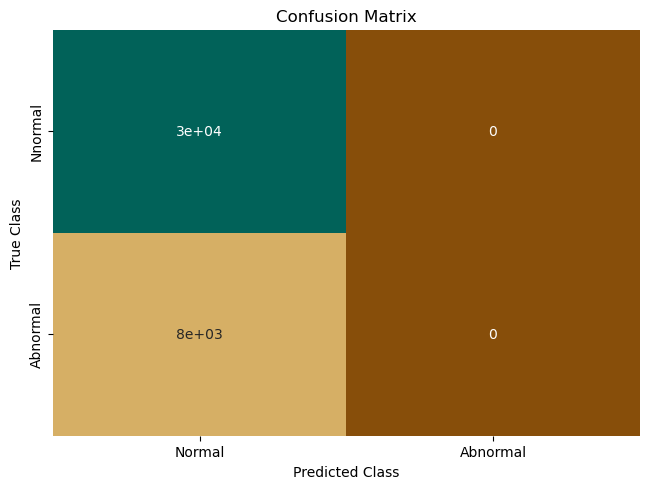

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

colormap = sns.color_palette("BrBG", 10)
sns.heatmap(df_confusion, annot=True, cbar=None, cmap=colormap)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

In [35]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

TN, FP, FN, TP = confusion_matrix(test_labels1, target_predicted_binary).ravel()

print(f"True Negative (TN) : {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")
print(f"True Positive (TP) : {TP}")

True Negative (TN) : 29553
False Positive (FP): 0
False Negative (FN): 8031
True Positive (TP) : 0


In [37]:
test_labels1 = test1.iloc[:,0];
print("Validation AUC", roc_auc_score(test_labels1, target_predicted) )

Validation AUC 0.6100943383184867


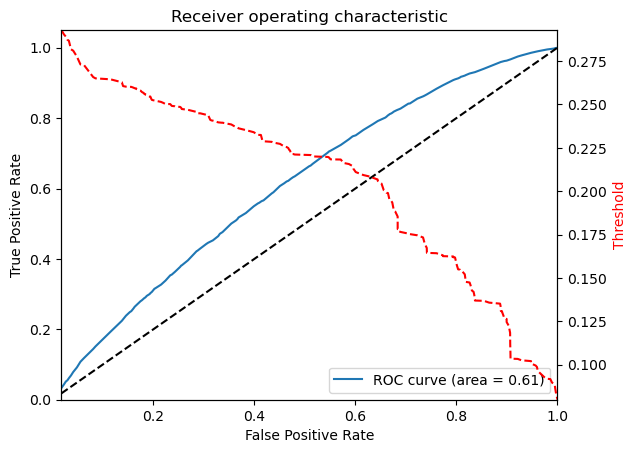

In [41]:
fpr, tpr, thresholds = roc_curve(test_labels1, target_predicted)

finite_indices = np.isfinite(thresholds) 
fpr_finite = fpr[finite_indices]
tpr_finite = tpr[finite_indices]
thresholds_finite = thresholds[finite_indices]

plt.figure()
plt.plot(fpr_finite, tpr_finite, label='ROC curve (area = %0.2f)' % auc(fpr_finite, tpr_finite))
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

roc_auc = auc(fpr, tpr)

if thresholds_finite.size > 0:
    ax2 = plt.gca().twinx()
    ax2.plot(fpr_finite, thresholds_finite, markeredgecolor='r', linestyle='dashed', color='r')
    ax2.set_ylabel('Threshold', color='r')
    ax2.set_ylim([thresholds_finite[-1], thresholds_finite[0]])
    ax2.set_xlim([fpr_finite[0], fpr_finite[-1]])

plt.show()

In [ ]:
# Write the final comments here and turn the cell type into markdown